In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('/Users/hrishityelchuri/Desktop/github/grabhack/driver-credit-scoring-engine/data/processed/df_clean.csv')

In [121]:
df.head(10)

,partner_id,role,gender,age_group,city_tier,tenure_months,days_active,trips_per_week,earnings_avg,earnings_var,...,cancel_rate,customer_rating,complaints,accidents,night_shift_pct,cashless_ratio,wallet_txn_volume,vehicle_age,past_due_history,good_repayment
0,1,driver,M,<=25,2,36,19,52,638.443420,4.633046,...,0.135795,4.837981,0,0,0.348988,0.350500,160.028448,4.336435,0,1
1,2,merchant,M,<=25,2,17,24,53,444.440684,4.250656,...,0.061321,4.778687,0,0,0.286113,0.915312,104.718719,5.482631,0,1
2,3,merchant,M,26-35,1,61,28,35,659.666189,5.412836,...,0.045608,4.418110,1,0,0.287171,0.642508,134.089531,6.072208,0,1
3,4,driver,F,<=25,3,33,18,58,503.720971,3.237181,...,0.053521,4.782128,0,0,0.279957,0.671180,268.472293,3.909398,0,0
4,5,driver,M,50+,3,27,19,57,637.742060,5.022423,...,0.150525,4.905054,0,0,0.108403,0.785409,0.000000,3.512688,0,1
5,6,driver,M,26-35,1,18,22,37,636.469940,5.016660,...,0.075852,4.652311,0,0,0.379658,0.468214,259.583308,0.681813,0,1
6,7,driver,F,26-35,2,22,22,58,678.314000,5.436600,...,0.206875,4.461817,0,0,0.206246,0.633950,307.046715,6.194107,0,1
7,8,merchant,M,<=25,2,46,12,54,899.190985,5.896492,...,0.047163,4.904197,0,0,0.310735,0.358591,351.989436,5.224075,0,1
8,9,driver,M,26-35,1,20,19,42,1020.971947,4.994169,...,0.035565,5.000000,0,0,0.414028,0.750592,208.373655,3.378341,0,1
9,10,merchant,M,26-35,1,16,30,64,1019.183175,4.483584,...,0.104014,4.901948,0,0,0.358153,0.620786,156.426249,4.467698,1,1


In [122]:
df.isna().sum()

partner_id           0
role                 0
gender               0
age_group            0
city_tier            0
tenure_months        0
days_active          0
trips_per_week       0
earnings_avg         0
earnings_var         0
on_time_rate         0
cancel_rate          0
customer_rating      0
complaints           0
accidents            0
night_shift_pct      0
cashless_ratio       0
wallet_txn_volume    0
vehicle_age          0
past_due_history     0
good_repayment       0
dtype: int64

In [123]:
df['vehicle_age']

0       4.336435
1       5.482631
2       6.072208
3       3.909398
4       3.512688
          ...   
7995    4.551144
7996    0.000000
7997    1.850392
7998    4.547698
7999    5.206713
Name: vehicle_age, Length: 8000, dtype: float64

In [124]:
def assign_vehicle_age_bin(age):
    if 0 <= age <= 3:
        return "new"
    elif 4 <= age <= 7:
        return "mid"
    else:
        return "old"

df['vehicle_age_bin'] = df['vehicle_age'].apply(assign_vehicle_age_bin)


In [125]:
df["earnings_cv"] = df["earnings_var"] / (df["earnings_avg"] + 1e-6)

In [126]:
df["productivity_stability"] = df["trips_per_week"] / df["days_active"]

In [127]:
# Feature engineering
df["earnings_stability"] = df["earnings_avg"] / (1 + df["earnings_var"])
df["wallet_txn_bin"] = pd.cut(
    df["wallet_txn_volume"],
    bins=[-1, 0, 100, 250, 400, df["wallet_txn_volume"].max()],
    labels=["0", "Low", "Medium", "High", "Very High"]
)

In [128]:
df["tenure_x_earnings"] = df["tenure_months"] * df["earnings_avg"]
df["active_x_reliability"] = df["days_active"] * (1 - df["cancel_rate"])

In [129]:
df.columns

Index(['partner_id', 'role', 'gender', 'age_group', 'city_tier',
       'tenure_months', 'days_active', 'trips_per_week', 'earnings_avg',
       'earnings_var', 'on_time_rate', 'cancel_rate', 'customer_rating',
       'complaints', 'accidents', 'night_shift_pct', 'cashless_ratio',
       'wallet_txn_volume', 'vehicle_age', 'past_due_history',
       'good_repayment', 'vehicle_age_bin', 'earnings_cv',
       'productivity_stability', 'earnings_stability', 'wallet_txn_bin',
       'tenure_x_earnings', 'active_x_reliability'],
      dtype='object')

In [130]:
df.head(5)

,partner_id,role,gender,age_group,city_tier,tenure_months,days_active,trips_per_week,earnings_avg,earnings_var,...,vehicle_age,past_due_history,good_repayment,vehicle_age_bin,earnings_cv,productivity_stability,earnings_stability,wallet_txn_bin,tenure_x_earnings,active_x_reliability
0,1,driver,M,<=25,2,36,19,52,638.443420,4.633046,...,4.336435,0,1,mid,0.007257,2.736842,113.338925,Medium,22983.963112,16.419894
1,2,merchant,M,<=25,2,17,24,53,444.440684,4.250656,...,5.482631,0,1,mid,0.009564,2.208333,84.644785,Medium,7555.491634,22.528292
2,3,merchant,M,26-35,1,61,28,35,659.666189,5.412836,...,6.072208,0,1,mid,0.008205,1.250000,102.866529,Medium,40239.637528,26.722965
3,4,driver,F,<=25,3,33,18,58,503.720971,3.237181,...,3.909398,0,0,old,0.006427,3.222222,118.881158,High,16622.792045,17.036618
4,5,driver,M,50+,3,27,19,57,637.742060,5.022423,...,3.512688,0,1,old,0.007875,3.000000,105.894600,0,17219.035633,16.140018


In [133]:
# Engagement
df["engagement_ratio"] = df["days_active"] / (df["tenure_months"] + 1)
df["weekly_trip_ratio"] = df["trips_per_week"] / (df["days_active"] + 1)

# Reliability
df["reliability_index"] = (1 - df["cancel_rate"]) * df["on_time_rate"]
df["complaint_rate"] = df["complaints"] / (df["trips_per_week"] + 1)
df["accident_rate"] = df["accidents"] / (df["tenure_months"] + 1)

# Financial
df["txn_freq_per_day"] = df["wallet_txn_volume"] / (df["days_active"] + 1)
df["wallet_txn_flag"] = (df["wallet_txn_volume"] > 0).astype(int)

# Vehicle
df["vehicle_utilization"] = df["trips_per_week"] / (df["vehicle_age"] + 1)

# Fairness-aware normalization
df["earnings_vs_city_avg"] = df.groupby("city_tier")["earnings_avg"].transform(
    lambda x: df["earnings_avg"] / (x.mean() + 1e-6)
)
df["rating_vs_age_avg"] = df.groupby("age_group")["customer_rating"].transform(
    lambda x: df["customer_rating"] / (x.mean() + 1e-6)
)

In [141]:
df.isna().sum()

partner_id                0
role                      0
gender                    0
age_group                 0
city_tier                 0
tenure_months             0
days_active               0
trips_per_week            0
earnings_avg              0
earnings_var              0
on_time_rate              0
cancel_rate               0
customer_rating           0
complaints                0
accidents                 0
night_shift_pct           0
cashless_ratio            0
wallet_txn_volume         0
vehicle_age               0
past_due_history          0
good_repayment            0
vehicle_age_bin           0
earnings_cv               0
productivity_stability    0
earnings_stability        0
wallet_txn_bin            0
tenure_x_earnings         0
active_x_reliability      0
engagement_ratio          0
weekly_trip_ratio         0
reliability_index         0
complaint_rate            0
accident_rate             0
txn_freq_per_day          0
wallet_txn_flag           0
vehicle_utilization 

In [142]:
df.drop(columns = ["vehicle_age", "trips_per_week", "earnings_var", "tenure_months", "days_active","wallet_txn_volume"], inplace = True)

<Axes: >

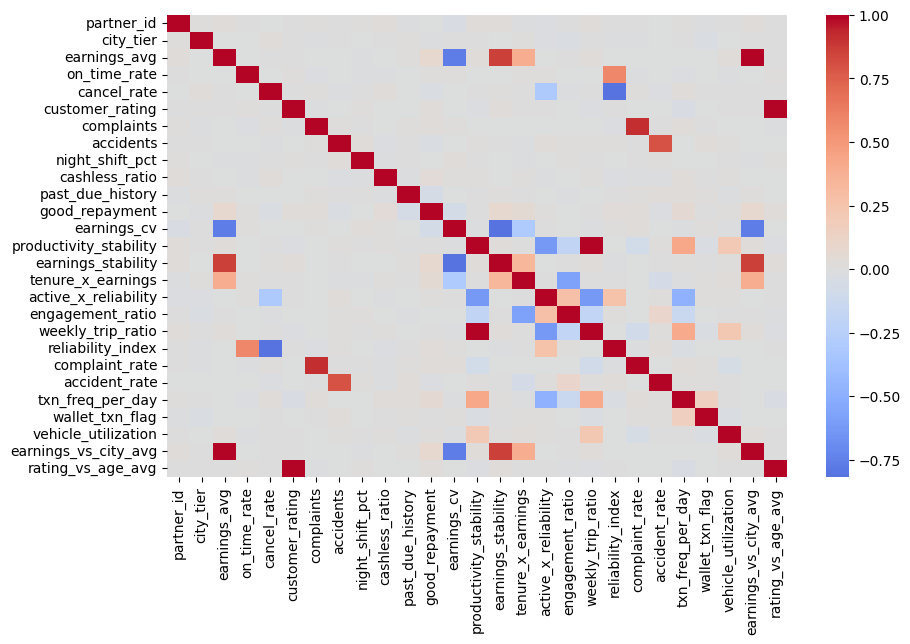

In [145]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)

In [149]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [151]:
corr = df[num_features].corr().abs()
high_corr_pairs = [
    (i, j, corr.loc[i, j]) 
    for i in corr.columns for j in corr.columns 
    if i != j and corr.loc[i, j] > 0.8
]
print(high_corr_pairs)

[('earnings_avg', 'earnings_stability', np.float64(0.8622009302002834)), ('earnings_avg', 'earnings_vs_city_avg', np.float64(0.999984374085949)), ('cancel_rate', 'reliability_index', np.float64(0.817751043955577)), ('customer_rating', 'rating_vs_age_avg', np.float64(0.9999087732883477)), ('complaints', 'complaint_rate', np.float64(0.9142576893750634)), ('earnings_cv', 'earnings_stability', np.float64(0.8170020754971692)), ('productivity_stability', 'weekly_trip_ratio', np.float64(0.9984807202702531)), ('earnings_stability', 'earnings_avg', np.float64(0.8622009302002834)), ('earnings_stability', 'earnings_cv', np.float64(0.8170020754971692)), ('earnings_stability', 'earnings_vs_city_avg', np.float64(0.8621658631162576)), ('weekly_trip_ratio', 'productivity_stability', np.float64(0.9984807202702531)), ('reliability_index', 'cancel_rate', np.float64(0.817751043955577)), ('complaint_rate', 'complaints', np.float64(0.9142576893750634)), ('earnings_vs_city_avg', 'earnings_avg', np.float64(0.

In [152]:
def drop_high_corr_features(df, threshold=0.85):
    """
    Drops one of the two features that have correlation > threshold.
    Keeps the one with higher variance (proxy for information).
    """
    corr_matrix = df.corr(numeric_only=True).abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # List of columns to drop
    to_drop = []
    for column in upper.columns:
        high_corr = [idx for idx, val in upper[column].items() if val > threshold]
        for idx in high_corr:
            # Keep the feature with higher variance
            if df[column].var() < df[idx].var():
                to_drop.append(column)
            else:
                to_drop.append(idx)

    return list(set(to_drop))

# Example usage
num_features = df.select_dtypes(include=[np.number])
features_to_drop = drop_high_corr_features(num_features, threshold=0.85)
print("Drop these:", features_to_drop)

df_reduced = df.drop(columns=features_to_drop)

Drop these: ['earnings_vs_city_avg', 'earnings_stability', 'rating_vs_age_avg', 'complaint_rate', 'weekly_trip_ratio']


In [153]:
df.columns

Index(['partner_id', 'role', 'gender', 'age_group', 'city_tier',
       'earnings_avg', 'on_time_rate', 'cancel_rate', 'customer_rating',
       'complaints', 'accidents', 'night_shift_pct', 'cashless_ratio',
       'past_due_history', 'good_repayment', 'vehicle_age_bin', 'earnings_cv',
       'productivity_stability', 'earnings_stability', 'wallet_txn_bin',
       'tenure_x_earnings', 'active_x_reliability', 'engagement_ratio',
       'weekly_trip_ratio', 'reliability_index', 'complaint_rate',
       'accident_rate', 'txn_freq_per_day', 'wallet_txn_flag',
       'vehicle_utilization', 'earnings_vs_city_avg', 'rating_vs_age_avg'],
      dtype='object')

In [154]:
df.to_csv("/Users/hrishityelchuri/Desktop/github/grabhack/driver-credit-scoring-engine/data/processed/df_feature_engineered.csv", index=False)